**`Noms et prenoms`**, `matricule` et `email` 

Department of Physics - Faculty of Science - University of Yaoundé I

`Nom du Laboratoire`

`Date`

Le **2,5,8,11-tétrakis(4-(9H-carbazol-9-yl)phényle)-6,7-diisopropylnéryl-1,4,5,8,9,11-hexaazatriphénylène** ou 4CzIPN, est repertorié dans la base de donnée PubChem comme le composé 102198498.

La molécule 4CzIPN présente des propriétés intéressantes pour les applications OLED en raison de sa haute efficacité lumineuse, de sa longue durée de vie et de sa stabilité thermique. Elle a été largement utilisée dans les écrans OLED pour les téléviseurs, les smartphones et les ordinateurs portables en raison de ses performances optimales et de sa faible consommation d'énergie.

1. Sa formule moléculaire est $C_{56}H_{32}NO_6$ et son poids moléculaire est 788.9 g/mol.

2. Utiliser `rdkit.Chem.MolFromSmiles` et `rdkit.Chem.AllChem` pour représenter en 2D, y compris explicitement les atomes d'hydrogènes, la molécule 4CzIPN à partir de son SMILES isomérique, disponible sur [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498). 


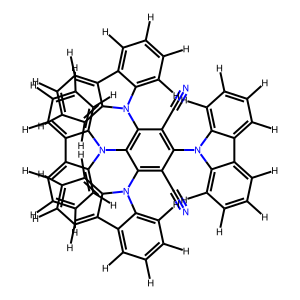

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem

CzIPN = 'C1=CC=C2C(=C1)C3=CC=CC=C3N2C4=C(C(=C(C(=C4C#N)N5C6=CC=CC=C6C7=CC=CC=C75)N8C9=CC=CC=C9C1=CC=CC=C18)N1C2=CC=CC=C2C2=CC=CC=C21)C#N'
mol = Chem.MolFromSmiles(CzIPN)
mol = AllChem.AddHs(mol)
Chem.Draw.MolToImage(mol)

3. Utiliser `rdkit.Chem.Descriptors` pour évaluer les propriétés physico-chimique suivantes de la molécule 4CzIPN : le poids moléculaire; poids moléculaire moyen de la molécule en ignorant les hydrogènes; logP ou solubilité, TPSA ou la polarité, nombre d'hydrogènes donneurs et nombre d'hydrogènes donneurs. Utiliser `pandas`pour présenter les résulats sous forme de tableau. **Noter les valeurs obtenues dans votre cahier de composition.**


In [4]:
from rdkit.Chem import Descriptors

molwt = Descriptors.ExactMolWt(mol)
hamolwt = Descriptors.HeavyAtomMolWt(mol)
logP = Descriptors.MolLogP(mol)
tpsa = Descriptors.TPSA(mol)
hbd = Descriptors.NumHDonors(mol)
hba = Descriptors.NumHAcceptors(mol)

print(f'Propriété de 4CzIPN :\n Poids Moléculaire={molwt}, \n Poids moléculaire moyen={hamolwt}, \n Solubilié={logP}, \n Polarité={tpsa}, \n nombre hydrogènes donneurs={hbd}, \n nombre hydrogènes accepteurs={hba}')

Propriété de 4CzIPN :
 Poids Moléculaire=788.2688450240009, 
 Poids moléculaire moyen=756.6579999999997, 
 Solubilié=13.818359999999974, 
 Polarité=67.3, 
 nombre hydrogènes donneurs=0, 
 nombre hydrogènes accepteurs=6


In [5]:
import pandas as pd
property =['Poids Moléculaire', 'Poids moléculaire moyen', 'Solubilié', 'Polarité', 'Nombre de liaisons donneurs hydrogènes', 'Nombre de liaisons accepteurs hydrogènes']
descriptor = [molwt, hamolwt, logP, tpsa, hbd, hba]
pd.DataFrame(dict(Propriété=property, Descripteur=descriptor))

,Propriété,Descripteur
0,Poids Moléculaire,788.268845
1,Poids moléculaire moyen,756.658000
2,Solubilié,13.818360
3,Polarité,67.300000
4,Nombre de liaisons donneurs hydrogènes,0.000000
5,Nombre de liaisons accepteurs hydrogènes,6.000000


4. Utiliser `rdkit.Chem import AllChem` et `rdkit.Chem.MolToXYZFile` pour écrire dans un fichier `"votre_nom_4CzIPN.xyz"`, les coordonnées au format xyz de la molécule 4CzIPN.

In [6]:
AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
Chem.MolToXYZFile(mol, 'test_4CzIPN.xyz')

5. 94
6. Utiliser `pyscf.gto` pour obtenir la valeur de l'énergie nucléaire de la molécule et **noter celle-ci dans votre cahier de composition**.

In [7]:
from pyscf import gto

# Remove the first line
with open('test_4CzIPN.xyz', "r") as f:
    lines = f.readlines()
    lines[0] = ""
with open('test_4CzIPN.xyz', "w") as f:
    f.writelines(lines)
    
CzIPN_mol = pyscf.gto.M(atom=open('test_4CzIPN.xyz').read(),
    charge=0,
    spin=0,
    basis='631g*',
    unit='Angstrom')

CzIPN_mol.build().get_enuc()

8751.620127456048

7. Le Hamiltonien 2-qubits de cette molécule est
\begin{equation*} \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X}) + h_6(\mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),
\end{equation*}
où les coefficients 
\begin{align*}
&h_1 = -0.46959492273396025,&&h_2 = -0.12480163590374627,\\
&h_3 = -0.026903253444563915,&&  h_4 = 0.004924575935052124,\\
&h_5 = -4.6840929608197336e-06,&& h_6 = - 4.683976972721447e-06.
\end{align*}
Utiliser, pour calculer l'état fondamental de la molécule 4CzIPN,
* `qiskit.opflow.operator_globals` et 
* `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

**Noter dans votre cahier de composition, la valeur propre et le vecteur propre de l'Hamiltonien**.

In [8]:

from qiskit.opflow.operator_globals import I, X, Z
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

h1 = -0.46959492273396025
h2 = -0.12480163590374627
h3 = -0.026903253444563915
h4 = 0.004924575935052124
h5 = -4.6840929608197336e-06
h6 = -4.683976972721447e-06

# Hamiltonian
H = h1*(I^I) + h2*(Z^I) - h2*(I^Z) + h3*(Z^Z) + h4*(X^X) + h5*(X^I) + h5*(I^X) + h5*(I^Z) + h6*(X^Z) - h6*(Z^X) 

exact_result = NumPyMinimumEigensolver().compute_minimum_eigenvalue(H)
print(f'\n L\'énergie de la molécule 4CzIPN vaut: {exact_result.eigenvalue} Hartree')
print(f'\n Le vecteur propre de la molécule 4CzIPN est:')
exact_result.eigenstate.draw('latex')

/tmp/ipykernel_128063/2317596376.py:1: DeprecationWarning: The ``qiskit.opflow`` module is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  from qiskit.opflow.operator_globals import I, X, Z



 L'énergie de la molécule 4CzIPN vaut: -0.6923388331772948 Hartree

 Le vecteur propre de de la molécule 4CzIPN est:


<IPython.core.display.Latex object>

In [9]:
import rdkit
print(rdkit.__version__)

2023.03.2


In [10]:
import pyscf
print(pyscf.__version__)

2.2.1


In [11]:
import qiskit.tools.jupyter
%qiskit_version_table